## Starter program for the following algorithms:
- Multiple Linear Regression (MLR)
- K-Nearest Neighbors (KNN)
- Random Forest (RF)
- Gradient Boosting
- XGBoost
- CatBoost

The program also provides a way of saving performance metrics for all iterations of the randomgridsearch. 

In addition, it shows how to pickle a model for reuse in the future

In [11]:
# -----------------------------------
# Importing the necessary libraries
# -----------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (11,8)})
pd.options.display.float_format = "{:.2f}".format

def get_data_path(relative_path: str) -> str:
    """
    Get the absolute path to a file in the `dataset` directory.

    Args:
        relative_path: The path to the file relative to the `dataset` directory including the file name.

    Returns:
        The full path to the file in the `dataset` directory.

    Examples:
        >>> get_data_path("assignment1/boston_listings.csv")
        "C:/Users/username/assignments/dataset/assignment1/boston_listings.csv"
    """
    return os.path.abspath(os.path.join("../../dataset", relative_path))

In [18]:
from sklearn.preprocessing import StandardScaler

# -----------------------------------
# Reading the base file
# -----------------------------------
lc = pd.read_csv(get_data_path("regression/lendingclub_sample.csv"))

# Take a random sample of size 5000
lc = lc.sample(5000)

lc_cleaned = lc[(lc["home_ownership"] != "ANY") & (lc["emp_length"] != "n/a")]
value_counts = lc_cleaned["purpose"].value_counts()

to_keep = value_counts[value_counts > 300].index

lc_cleaned = lc_cleaned [lc_cleaned ["purpose"].isin(to_keep)]

X = lc_cleaned [[ "annual_inc", "emp_length", "home_ownership", "term", 
                  "total_rec_int", "total_bal_il", "mths_since_last_delinq", "revol_bal", 
                  "inq_last_6mths", "application_type", "verification_status_joint", "purpose"]]

y = lc_cleaned ["loan_amnt"]

X_encoded = pd.get_dummies(X, columns=["emp_length", "home_ownership", "term", 
                                      "application_type", "verification_status_joint", "purpose"], drop_first=True)

numerical_features = [ "annual_inc", "total_rec_int", "total_bal_il", 
                      "mths_since_last_delinq", "revol_bal", "inq_last_6mths"]

X_encoded = X_encoded.dropna()
y = y[X_encoded.index]

# standardize the X columns that are numerical and not binary
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

X_encoded = X_encoded.reset_index(drop=True)
y = y.reset_index(drop=True)

print("Encoded data shape:", X_encoded.shape)

Encoded data shape: (2036, 25)


In [19]:
display(X_encoded.head())

,annual_inc,total_rec_int,total_bal_il,mths_since_last_delinq,revol_bal,inq_last_6mths,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,...,emp_length_< 1 year,home_ownership_OWN,home_ownership_RENT,term_ 60 months,application_type_Joint App,verification_status_joint_Source Verified,verification_status_joint_Verified,purpose_debt_consolidation,purpose_home_improvement,purpose_other
0,-0.43,-1.05,-0.08,-1.06,0.46,0.75,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
1,-0.57,-0.55,-0.01,-0.56,-0.02,-0.62,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,-0.28,-0.53,-0.64,-0.79,-0.58,-0.62,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.45,-0.20,-0.59,0.58,-0.19,-0.62,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.40,-0.06,-0.33,1.35,-0.16,-0.62,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [21]:
# -----------------------------------
# Splitting the data into training and testing sets (80/20 split)
# -----------------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (1628, 25)
Test data shape: (408, 25)


## Multiple Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
# Evaluation metrics for regression: R-squared value, Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

from sklearn.metrics import r2_score

# Initialize the Multiple Linear Regression model
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlr = mlr_model.predict(X_test)

# Calculate R-squared value
r2_mlr = r2_score(y_test, y_pred_mlr)

print("R-squared value:", r2_mlr)

# -----------------------------------
# Evaluation metrics report
# -----------------------------------

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)

# Calculate Root Mean Squared Error (RMSE)
rmse_mlr = np.sqrt(mse_mlr)

print("Mean Squared Error (MSE):", mse_mlr)
print("Root Mean Squared Error (RMSE):", rmse_mlr)

R-squared value: 0.5396293276210906
Mean Squared Error (MSE): 41506511.93921517
Root Mean Squared Error (RMSE): 6442.55476804157


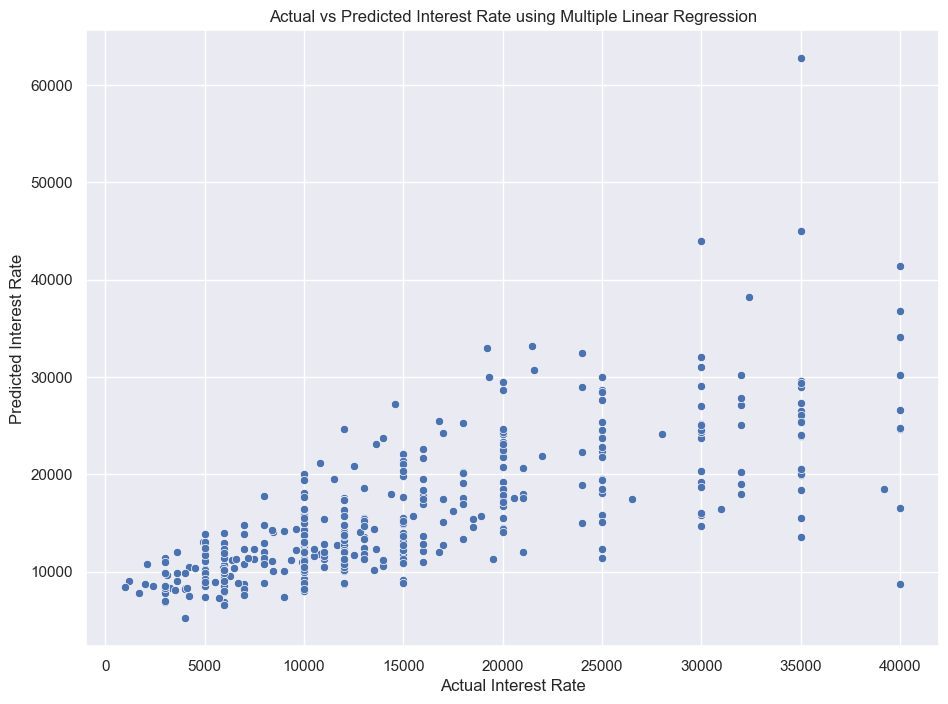

In [17]:
# Scatterplot of the predicted values versus the actual values using seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred_mlr)
plt.xlabel("Actual Interest Rate")
plt.ylabel("Predicted Interest Rate")
plt.title("Actual vs Predicted Interest Rate using Multiple Linear Regression")
plt.show()

## KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Options for the "scoring" argument in GridSearchCV:
#     - "accuracy"
#     - "adjusted_rand_score"
#     - "average_precision"
#     - "f1"
#     - "f1_micro"
#     - "f1_macro"
#     - "f1_weighted"
#     - "f1_samples"
#     - "neg_log_loss"
#     - "precision"
#     - "recall"
#     - "roc_auc"
#     - "r2"
#     - "neg_mean_absolute_error"
#     - "neg_mean_squared_error"
#     - "neg_mean_squared_log_error"
#     - "neg_median_absolute_error"
#     - "explained_variance"
#     - "balanced_accuracy"

from sklearn.model_selection import GridSearchCV

# Define the model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid to tune
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

# Initialize GridSearchCV
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring="r2", n_jobs=-1)

# Fit the model
knn_grid.fit(X_train, y_train)

# Best parameters
knn_best_params = knn_grid.best_params_

# Make predictions on the test set using the best model
y_pred_knn = knn_grid.predict(X_test)

# Calculate R-squared value
r2_knn = r2_score(y_test, y_pred_knn)

display(knn_best_params, r2_knn)

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}

0.4804843492404792

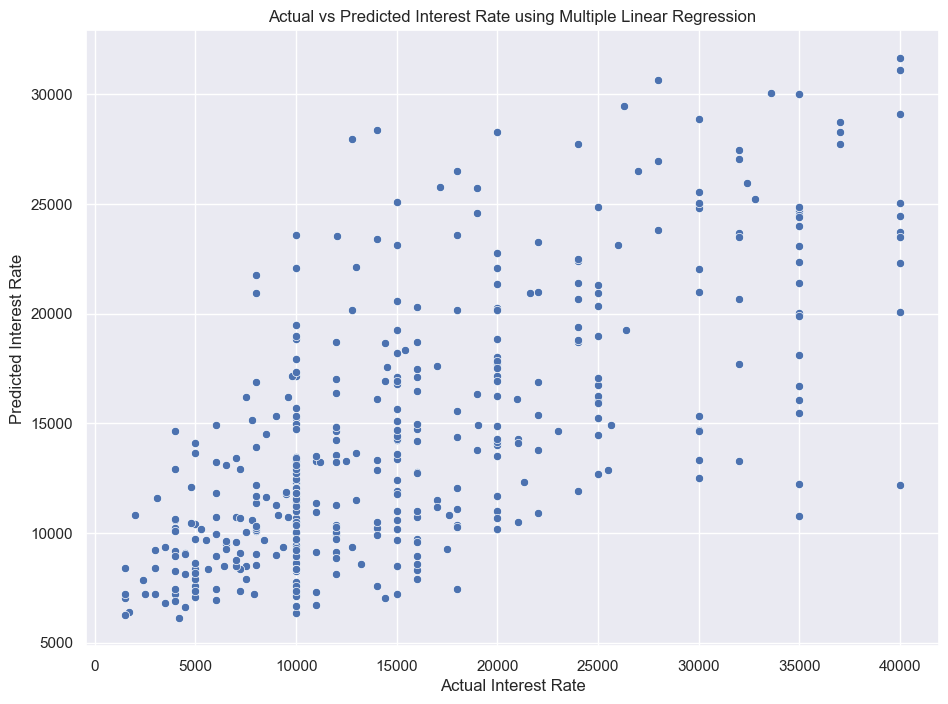

In [25]:
# Scatterplot of the predicted values versus the actual values using seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred_knn)
plt.xlabel("Actual Interest Rate")
plt.ylabel("Predicted Interest Rate")
plt.title("Actual vs Predicted Interest Rate using Multiple Linear Regression")
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid to tune
rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring="r2", n_jobs=-1)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters
rf_best_params = rf_grid.best_params_

# Make predictions on the test set using the best model
y_pred_rf = rf_grid.predict(X_test)

# Calculate R-squared value
r2_rf = r2_score(y_test, y_pred_rf)

display(rf_best_params, r2_rf)

# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(rf_grid.cv_results_)
cv_results_df = cv_results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

0.5767282096628119


All R-2 values and parameter combinations:
                                               params  mean_test_score  \
0   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.59   
1   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.59   
2   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.59   
3   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.59   
4   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...             0.59   
5   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...             0.59   
6   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...             0.59   
7   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...             0.60   
8   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...             0.58   
9   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...             0.59   
10  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...             0.58   
11  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...             0.

## Saving performance metrics for randomized iterations of the grid search

In [27]:
import pandas as pd
import pickle
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint

# Suppress warning messages
warnings.filterwarnings("ignore")


# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training Random Forest...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_rf_model.get_params())
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)


# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)

Training Random Forest...

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Hyperparameters of the Best Model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R-2 Score: 0.581482790966812

All R-2 values and parameter combinations:
                                              params  mean_test_score  \
0  {'n_estimators': 200, 'min_samples_split': 5, ...             0.59   
1  {'n_estimators': 100, 'min_samples_split': 2, ...             0.59   
2  {'n_estimators': 100, 'min_samples_split': 5, ...             0.59   
3  {'n_estimators': 200, 'min_samples_split': 2, ...             0.59   
4

In [21]:
cv_results_df.to_csv("cv_results_df.csv")

## Pickling the best model

In [22]:
# --------------------
# Save the best model
# --------------------
with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

print("Best Random Forest model saved as 'best_rf_model.pkl'")

# --------------------
# Load the model from disk
# --------------------
with open("best_rf_model.pkl", "rb") as f:
    loaded_rf_model = pickle.load(f)

Best Random Forest model saved as 'best_rf_model.pkl'


In [23]:
# -----------------------------------
# Apply the loaded model on a new sample
# -----------------------------------
new_sample = X_test.iloc[0, :].values.reshape(1, -1)
display(new_sample)

array([[ 1.9424067 ,  0.30717097,  2.93885407, -0.21212829,  0.32939434,
         0.20291202, -0.64748848,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [24]:
prediction = loaded_rf_model.predict(new_sample)
print("\nPrediction for a new sample:", prediction)


Prediction for a new sample: [0.15698752]


## Gradient Boosted Tree

In [38]:
import pandas as pd
import pickle
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint

# Suppress warning messages
warnings.filterwarnings("ignore")


# Define the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": randint(50, 200, 500),
    "max_depth": randint(3,5, 20),
    "learning_rate": [0.01, 0.001,0.1,  ]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gb_model, param_grid, n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training Gradient Boosting...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_gb_model.get_params())
best_gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)

# Save the best model
with open("best_gb_model.pkl", "wb") as f:
    pickle.dump(best_gb_model, f)
print("Best Gradient Boosting model saved as 'best_gb_model.pkl'")

# Load the model from disk
with open("best_gb_model.pkl", "rb") as f:
    loaded_gb_model = pickle.load(f)

# Apply the loaded model on a new sample
new_sample = X_test.iloc[0, :].values.reshape(1, -1)
prediction = loaded_gb_model.predict(new_sample)
print("\nPrediction for a new sample:", prediction)

# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)


Training Gradient Boosting...

Best Parameters: {'learning_rate': 0.1, 'max_depth': 23, 'n_estimators': 624}
Hyperparameters of the Best Model: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 23, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 624, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
R-2 Score: 0.3196512754323839
Best Gradient Boosting model saved as 'best_gb_model.pkl'

Prediction for a new sample: [39999.98508138]

All R-2 values and parameter combinations:
                                              params  mean_test_score  \
0  {'learning_rate': 0.2, 'max_depth': 24, 'n_est...             0.28   
1  {'learning_rate': 0.2, 'max_depth': 23, 'n_est...             0.29   

## <font color = darkblue> XGBoost

In [15]:
import pandas as pd
import pickle
import warnings
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform

# Suppress warning messages
warnings.filterwarnings("ignore")

# Load Boston Housing data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(1, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training XGBoost...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the XGBoost model with the best parameters
best_xgb_model = XGBRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_xgb_model.get_params())
best_xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)

# Save the best model
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb_model, f)
print("Best XGBoost model saved as "best_xgb_model.pkl"")

# Load the model from disk
with open("best_xgb_model.pkl", "rb") as f:
    loaded_xgb_model = pickle.load(f)

# Apply the loaded model on a new sample
new_sample = X_test.iloc[0, :].values.reshape(1, -1)
prediction = loaded_xgb_model.predict(new_sample)
print("\nPrediction for a new sample:", prediction)

# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)

Training XGBoost...

Best Parameters: {'colsample_bytree': 0.5325257964926398, 'learning_rate': 0.19977710745066668, 'max_depth': 2, 'n_estimators': 58, 'subsample': 0.5079831261101071}
Hyperparameters of the Best Model: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5325257964926398, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.19977710745066668, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 2, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 58, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 

## CATBOOST

In [77]:
# Run Catboost model following similar steps for the other algorithsm above
from catboost import CatBoostRegressor


# Define the CatBoost model
cat_model = CatBoostRegressor(random_state=42, verbose=0)

# Define the hyperparameter grid
param_grid = {
    "iterations": [50, 100, 200],
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.1, 1]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(cat_model, param_grid, n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training CatBoost...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the CatBoost model with the best parameters
best_cat_model = CatBoostRegressor(random_state=42, verbose=0, **best_params)
print("Hyperparameters of the Best Model:", best_cat_model.get_params())
best_cat_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_cat_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)

# # Save the best model
# with open("best_cat_model.pkl", "wb") as f:
#     pickle.dump(best_cat_model, f)

# # Load the model from disk
# with open("best_cat_model.pkl", "rb") as f:
#     loaded_cat_model = pickle.load(f)

# # Apply the loaded model on a new sample
# new_sample = X_test.iloc[0, :].values.reshape(1, -1)
# prediction = loaded_cat_model.predict(new_sample)
# print("\nPrediction for a new sample:", prediction)

# # Save all R-2 values and parameter combinations
# cv_results_df = pd.DataFrame(random_search.cv_results_)
# cv_results_df = cv_results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]
# print("\nAll R-2 values and parameter combinations:")
# print(cv_results_df)

Training CatBoost...

Best Parameters: {'learning_rate': 0.1, 'iterations': 100, 'depth': 6}
Hyperparameters of the Best Model: {'iterations': 100, 'learning_rate': 0.1, 'depth': 6, 'loss_function': 'RMSE', 'verbose': 0, 'random_state': 42}
R-2 Score: 0.6137165779170037


## Putting it all together

In [82]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define models
models = {
    "MLR": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "RF": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective ="reg:squarederror"),
    "CatBoost": CatBoostRegressor(random_state=42, silent=True)
    }

# Define hyperparameter grids
param_grids = {
    "MLR": {},
    "KNN": {"n_neighbors": randint(1, 20)},
    "RF": {"n_estimators": randint(50, 200), "max_depth": randint(1, 20)},
    "Gradient Boosting": {"n_estimators": randint(50, 200), "learning_rate": uniform(0.01, 0.3)},
    "XGBoost": {"n_estimators": randint(50, 200), "learning_rate": uniform(0.01, 0.3), "max_depth": randint(1, 20)},
   "CatBoost": {"iterations": randint(50, 200), "learning_rate": uniform(0.01, 0.3), "depth": randint(1, 20)}
   }

# Initialize results storage
results = pd.DataFrame(columns=["Model", "Best Params", "R-2 Score"])

# Initialize storage for all R-2 values and parameter combinations
all_results = []

# Perform hyperparameter tuning and model evaluation
for name, model in models.items():
    print(f"Training {name}...")
    random_search = RandomizedSearchCV(model, param_grids[name], n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1, return_train_score=True)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results = results.append({"Model": name, "Best Params": random_search.best_params_, "R-2 Score": r2}, ignore_index=True)
    
    # Save all R-2 values and parameter combinations
    cv_results_df = pd.DataFrame(random_search.cv_results_)
    cv_results_df["Model"] = name
    all_results.append(cv_results_df)
    
    # Pickle the best model if it is the best so far
    if results["R-2 Score"].idxmax() == results.index[-1]:
        with open("best_model.pkl", "wb") as f:
            pickle.dump(best_model, f)

# Combine all results into a single dataframe
all_results_df = pd.concat(all_results, ignore_index=True)

# Display results
print("\nModel Comparison:")
print(results.sort_values(by="R-2 Score", ascending=False))

# Display all R-2 values and parameter combinations
print("\nAll R-2 values and parameter combinations:")
print(all_results_df[["Model", "params", "mean_test_score", "std_test_score", "rank_test_score"]])


Training MLR...
Training KNN...
Training RF...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...

Model Comparison:
               Model                                        Best Params  \
5           CatBoost  {'depth': 6, 'iterations': 179, 'learning_rate...   
3  Gradient Boosting  {'learning_rate': 0.06503043695984914, 'n_esti...   
2                 RF              {'max_depth': 7, 'n_estimators': 171}   
4            XGBoost  {'learning_rate': 0.11011258334170654, 'max_de...   
0                MLR                                                 {}   
1                KNN                                {'n_neighbors': 11}   

   R-2 Score  
5       0.62  
3       0.61  
2       0.60  
4       0.59  
0       0.48  
1       0.38  

All R-2 values and parameter combinations:
                Model                                             params  \
0                 MLR                                                 {}   
1                 KNN               

## Tracking Building of Trees and Variable Importance 

[0]	train-rmse:21.87413	validation-rmse:20.57086
[1]	train-rmse:19.81322	validation-rmse:18.67521
[2]	train-rmse:17.95943	validation-rmse:16.96616
[3]	train-rmse:16.29520	validation-rmse:15.39869
[4]	train-rmse:14.79302	validation-rmse:14.01634
[5]	train-rmse:13.43530	validation-rmse:12.74250
[6]	train-rmse:12.21801	validation-rmse:11.58183
[7]	train-rmse:11.12191	validation-rmse:10.58639
[8]	train-rmse:10.13585	validation-rmse:9.75835
[9]	train-rmse:9.25400	validation-rmse:8.91544
[10]	train-rmse:8.46108	validation-rmse:8.24855
[11]	train-rmse:7.74976	validation-rmse:7.58582
[12]	train-rmse:7.11095	validation-rmse:7.04660
[13]	train-rmse:6.54430	validation-rmse:6.53355
[14]	train-rmse:6.03613	validation-rmse:6.12329
[15]	train-rmse:5.58751	validation-rmse:5.77671
[16]	train-rmse:5.18384	validation-rmse:5.40153
[17]	train-rmse:4.82756	validation-rmse:5.11892
[18]	train-rmse:4.51045	validation-rmse:4.82795
[19]	train-rmse:4.22995	validation-rmse:4.56871
[20]	train-rmse:3.97692	validatio

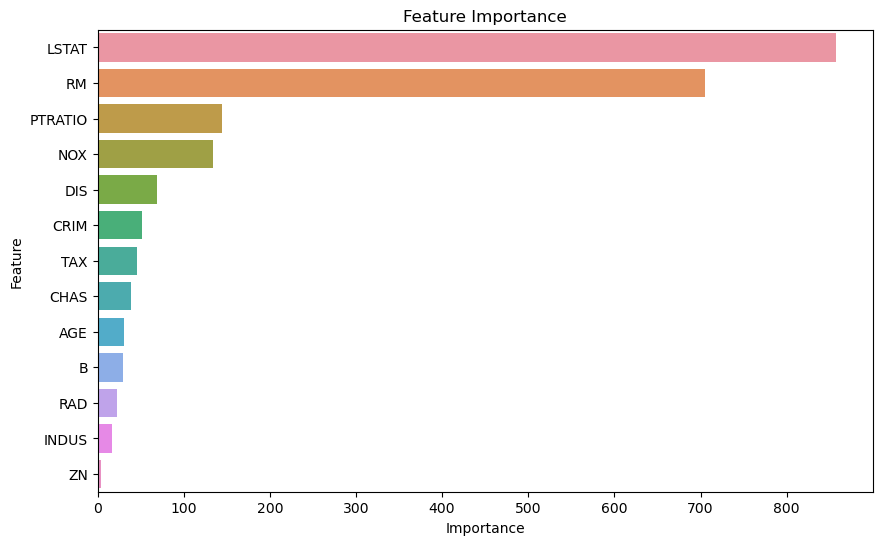

In [31]:
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix objects (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define the parameters for the XGBoost model
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 3,
    "seed": 42
}

# Train the XGBoost model with early stopping
num_rounds = 100
evals = [(dtrain, "train"), (dval, "validation")]
bst = xgb.train(params, dtrain, num_rounds, evals, early_stopping_rounds=10, verbose_eval=True)

# Make predictions on the validation set
y_pred = bst.predict(dval, ntree_limit=bst.best_ntree_limit)

# Calculate RMSE on the validation set
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE on validation set: {rmse:.4f}")

# Calculate R-squared on the validation set
r2 = r2_score(y_val, y_pred)
print(f"R-squared on validation set: {r2:.4f}")

# Plot feature importance using seaborn
feature_importance = bst.get_score(importance_type="gain")
feature_importance = pd.DataFrame(list(feature_importance.items()), columns=["Feature", "Importance"])
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()